In [1]:
import numpy as np
import matplotlib.pyplot as plt

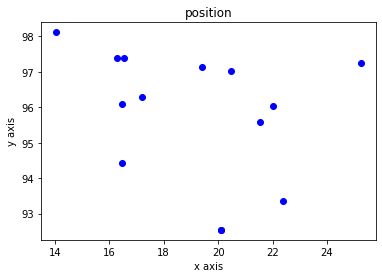

In [2]:
# pos = np.array([[2,1],
#                 [1,5],
#                 [2,8],
#                 [4,9],
#                 [7,8],
#                 [9,5],
#                 [8,1],
#                 [5,1],
#                 [4,3],
#                 [7,2]])

pos = np.array([[16.47, 96.10],
                [16.47, 94.44],
                [20.09, 92.54],
                [22.39, 93.37],
                [25.23, 97.24],
                [22.00, 96.05],
                [20.47, 97.02],
                [17.20, 96.29],
                [16.30, 97.38],
                [14.05, 98.12],
                [16.53, 97.38],
                [21.52, 95.59],
                [19.41, 97.13],
                [20.09, 92.55]])

num = len(pos)

#绘图

x = pos[:,0]
y = pos[:,1]
plt.title("position") 
plt.xlabel("x axis") 
plt.ylabel("y axis")
plt.plot(x,y,"ob") 
plt.show()

In [3]:
# 求某个解的距离
def distence2point(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

disMat = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        disMat[i][j] = disMat[j][i] = distence2point(pos[i], pos[j])

In [51]:
def initPhe(c):
    pheromone = np.full((num, num), c)
    return pheromone

temp = list(range(1, num))
tabuSample = []
for i in range(10):
    tabuSample.append(temp.copy())
tabuSample = np.array(tabuSample)

def move_update(count, phe):
    
    tabu = tabuSample.copy()
    for i in range(num - 1):
        temp1 = 0
        possibility = []
        sum=0
        for i in tabu:
            temp2 = np.random.choice(tabu, 1)[0]
            d = disMat[temp1, temp2]
            sum += 1 / d
            possibility.append(sum)

        ran = np.random.random() * sum
        for j in range(len(tabu)):
            if (ran < possibility[j]):
                temp1 = temp2
                temp2 = tabu[j]
                tabu = tabu[tabu != j]
                break

phe = initPhe(0.1)
move_update(10, phe)

[ 1  2  3  4  6  7  8  9 10 11 12 13]
9
6
